In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

## HESE Aeffs from cascade model

In [3]:
path = "../../cascade_model/aeff_HESE/"
names = os.listdir(path)

In [4]:
aeffs = []
for name in names:  
    df = pd.read_csv(path+name, sep=" ")
    ebin_cen = (df.ebin_low.unique() + df.ebin_high.unique())/2
    costhbin_cen = (df.costhbin_low.unique() + df.costhbin_high.unique())/2
    aeff = df.aeff.values.reshape(len(ebin_cen), len(costhbin_cen))
    aeffs.append(aeff)

In [5]:
# sum
total_aeff = np.zeros_like(aeffs[0])
for aeff in aeffs:
    total_aeff += aeff

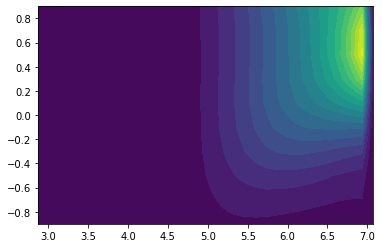

In [6]:
fig, ax = plt.subplots()
ax.contourf(ebin_cen, costhbin_cen, total_aeff.T,
            levels=20)

In [7]:
np.max(aeffs[names=="effective_area.HESE.nue.CC.txt"])

13.00824896983286

In [8]:
np.max(total_aeff) # units?

181.19080029648822

## Compare with current version of CascadeDetectorModel

In [43]:
from python.detector_model import CascadesDetectorModel
from python.backend.stan_generator import StanGenerator

In [44]:
with StanGenerator():
    dm = CascadesDetectorModel()
    effective_area = dm.effective_area
    energy_resolution = dm.energy_resolution

In [45]:
ebin_edges = effective_area._tE_bin_edges
cosz_edges = effective_area._cosz_bin_edges
ebin_cen = (ebin_edges[:-1] + ebin_edges[1:])/2
cosz_cen = (cosz_edges[:-1] + cosz_edges[1:])/2

(3.0, 7.0)

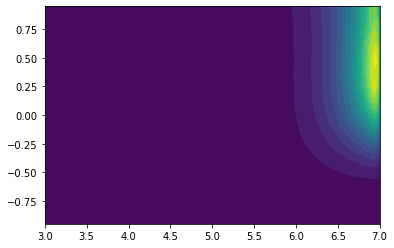

In [49]:
fig, ax = plt.subplots()
ax.contourf(np.log10(ebin_cen), cosz_cen, effective_area._eff_area.T, levels=20)
ax.set_xlim(3, 7)

In [24]:
np.max(effective_area._eff_area)

145.08302545007166

In [14]:
np.log10(60*1e3)

4.778151250383644

## Files from server

In [15]:
import h5py

In [52]:
name = "nue_CC_simulation_gamma_1.0_lEmin_4.477121254719663_lEmax_7.0_cascades_conv.h5"
df = pd.read_hdf(name)   

In [53]:
len(df.generation_weight)/1e7

1.0

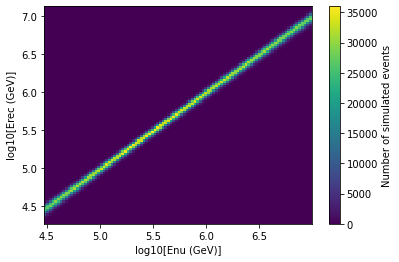

In [54]:
binc_CC, eprim_edges_CC, erec_edges_CC, _ = plt.hist2d(np.log10(df['prim_energy']), np.log10(df['rec_energy']), bins=[100, 100])
cb = plt.colorbar()
cb.set_label('Number of simulated events')
plt.xlabel('log10[Enu (GeV)]')
plt.ylabel('log10[Erec (GeV)]')
plt.show()

In [19]:
df.columns

Index(['generation_weight', 'prim_coszenith', 'rec_coszenith', 'dep_energy',
       'prim_type', 'rec_energy', 'prim_energy', 'prim_azimuth', 'rec_azimuth',
       'bjorken_y', 'conv_flux'],
      dtype='object')

In [20]:
from matplotlib.colors import LogNorm

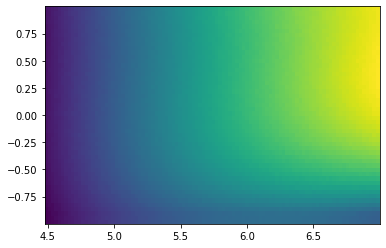

In [30]:
weights_plot=df['generation_weight'] * 1e-4 / (2.*np.pi)
contents, _, _, _ = plt.hist2d(np.log10(df['prim_energy']), df['prim_coszenith'], weights = weights_plot, bins=[100, 50], norm=LogNorm())

In [31]:
# rescale as in aeff_HESE.ipynb to correct for bin areas

In [41]:
np.max(contents)

716645.1799006662

In [42]:
df['generation_weight'][0:10]

0    1.338766e+05
1    4.770609e+04
2    3.163177e+06
3    9.477678e+06
4    3.317877e+05
5    5.421535e+04
6    2.533296e+05
7    1.097212e+04
8    3.044346e+04
9    5.803414e+04
Name: generation_weight, dtype: float64

## Tracks Aeff

In [38]:
with h5py.File("input/tracks/effective_area.h5", 'r') as f:
    
    a = f["2010/nu_mu/area"][()]

In [40]:
np.max(a)

58140.32297558405